In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

from tensorflow import keras

import utils

plt.rcParams['figure.figsize'] = (25, 8)
plt.rcParams["figure.autolayout"] = True

In [2]:
df_genre = pd.read_csv("all_genre.csv")

In [3]:
df_genre.head()

id                                        preview_url  \
0  1EzrEOXmMH3G43AXT1y7pA  https://p.scdn.co/mp3-preview/28154061cbfda9d5...   
1  4E6cwWJWZw2zWf7VFbH7wf  https://p.scdn.co/mp3-preview/7ed132f9327678a8...   
2  53QF56cjZA9RTuuMZDrSA6  https://p.scdn.co/mp3-preview/bf486b927761bf99...   
3  0IktbUcnAGrvD03AWnz3Q8  https://p.scdn.co/mp3-preview/a89bf59628fb81ad...   
4  6Uy6K3KdmUdAfelUp0SeXn  https://p.scdn.co/mp3-preview/43d2cef16aa11c7d...   

      genre  danceability  energy  key  loudness  mode  speechiness  \
0  acoustic         0.703   0.444   11    -9.331     1       0.0417   
1  acoustic         0.583   0.786    2    -3.142     0       0.0301   
2  acoustic         0.483   0.303    4   -10.058     1       0.0429   
3  acoustic         0.625   0.414    0    -8.700     1       0.0369   
4  acoustic         0.551   0.836   10    -3.838     0       0.0524   

   acousticness  instrumentalness  liveness  valence    tempo  \
0       0.55900          0.000000    0.0973    0.712  150.960   
1       0.02080          0.000000    0.1880    0.573  123.055   
2       0.69400          0.000000    0.1150    0.139  133.406   
3       0.29400          0.000000    0.1510    0.669  130.088   
4       0.00502          0.000021    0.0425    0.758  185.063   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1Ezr...       242947   
1  https://api.spotify.com/v1/audio-analysis/4E6c...       258827   
2  https://api.spotify.com/v1/audio-analysis/53QF...       240166   
3  https://api.spotify.com/v1/audio-analysis/0Ikt...       189613   
4  https://api.spotify.com/v1/audio-analysis/6Uy6...       220573   

        file_name  
0  acoustic_1.wav  
1  acoustic_2.wav  
2  acoustic_3.wav  
3  acoustic_4.wav  
4  acoustic_5.wav

In [6]:
parent_dir = "E:/genre_classification_data/music_data/"

In [7]:
filename = os.path.join(parent_dir + "anime/anime_1.wav")


x, sr = librosa.load(filename, sr=None, mono=True,offset=0.0, duration=5.0)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 0, 5
ipd.Audio(data=x[start*sr:end*sr], rate=sr)
x.shape

Duration: 5.00s, 220500 samples


(220500,)

## wave radio

(44100,)

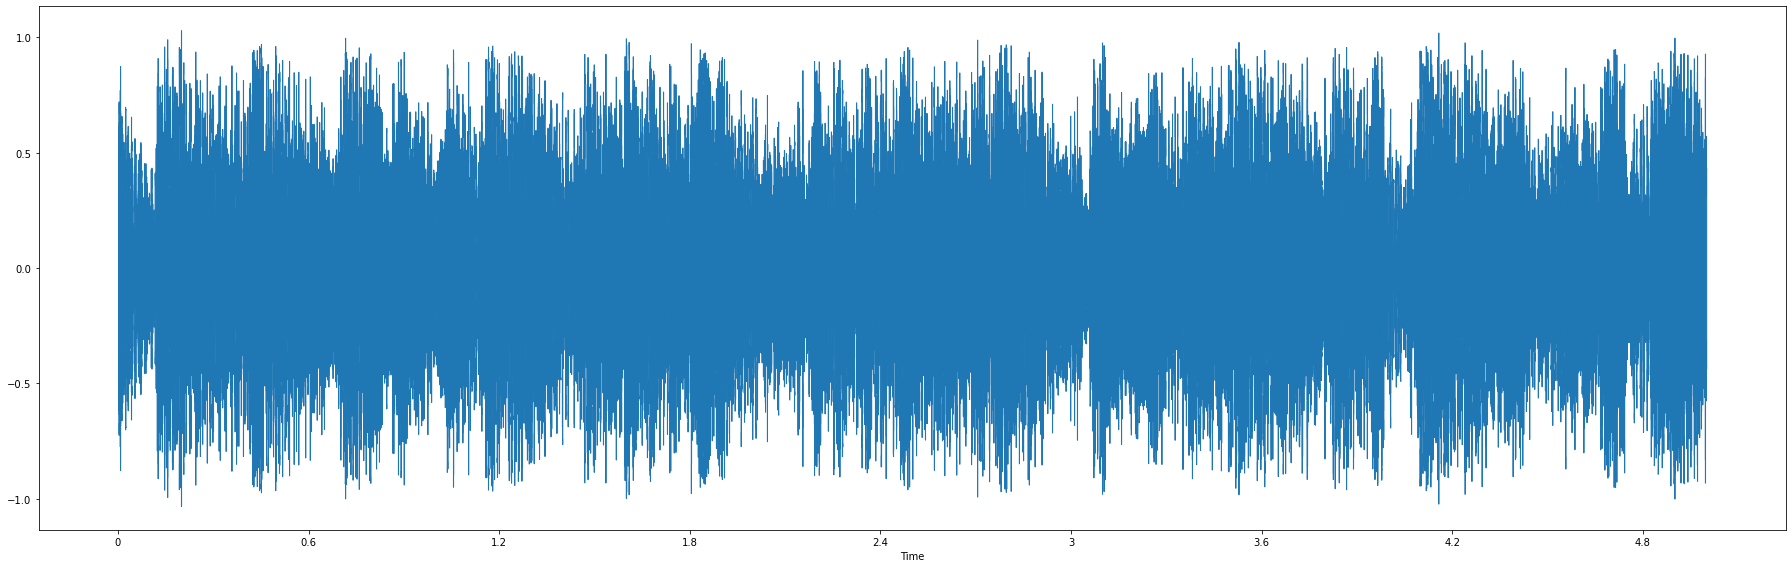

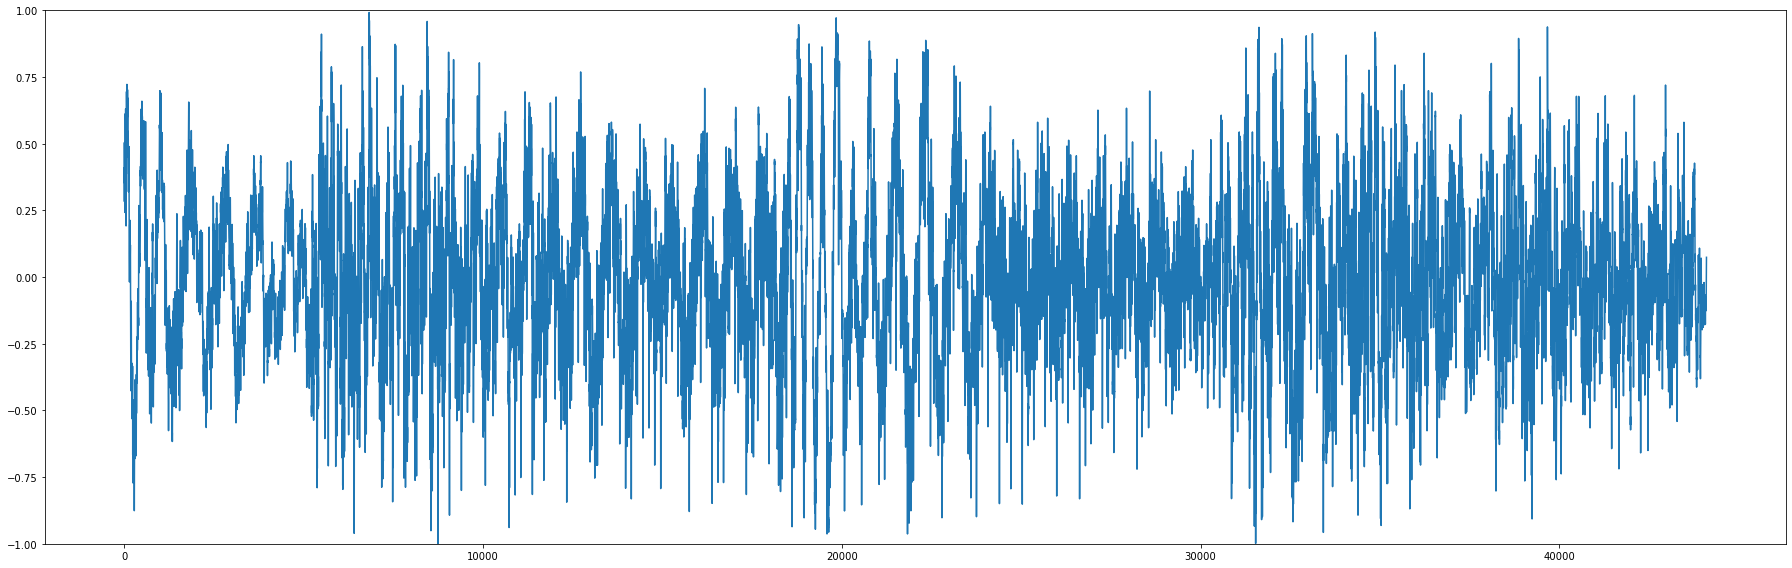

In [9]:
librosa.display.waveshow(x,sr=sr);
# plt.vlines([start, end], -1, 1)

plt.figure()
plt.plot(x[start:start+sr])
plt.ylim((-1, 1));
x[start:start+sr].shape

## chroma feature

(12, 431)

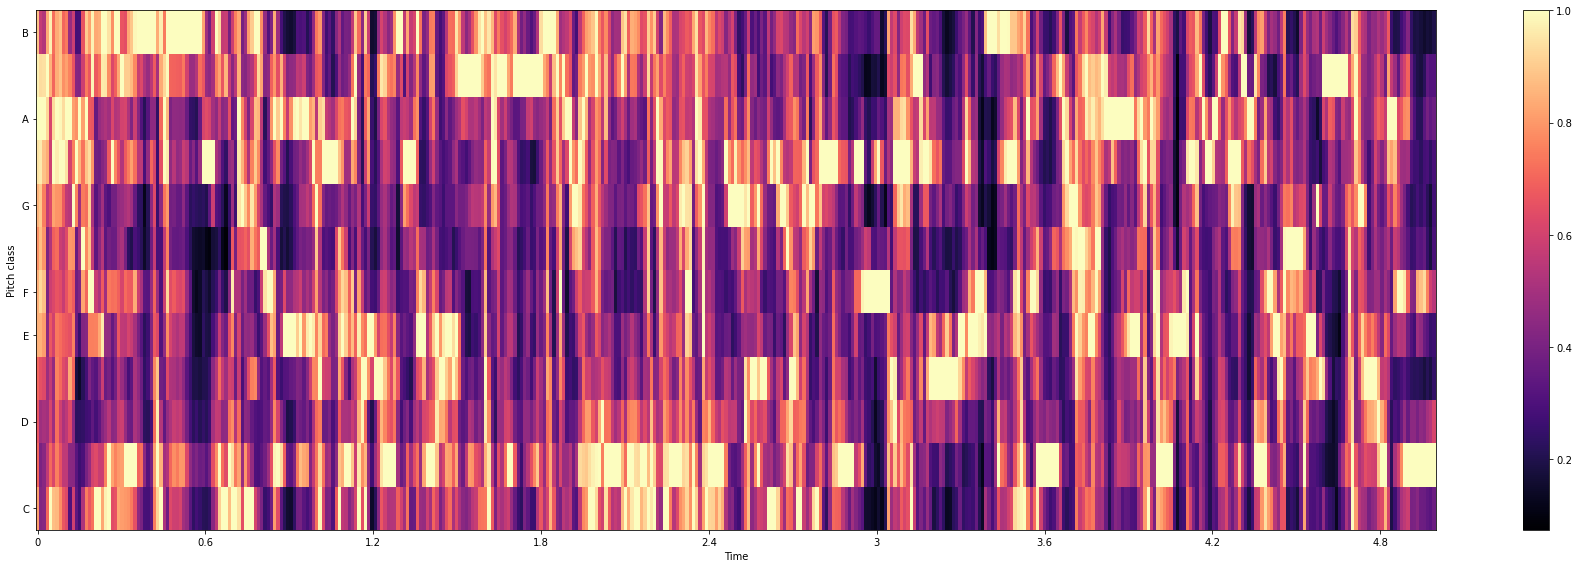

In [13]:
chroma = librosa.feature.chroma_stft(y=x,sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma,sr=sr, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img)
chroma.shape

(12, 87)

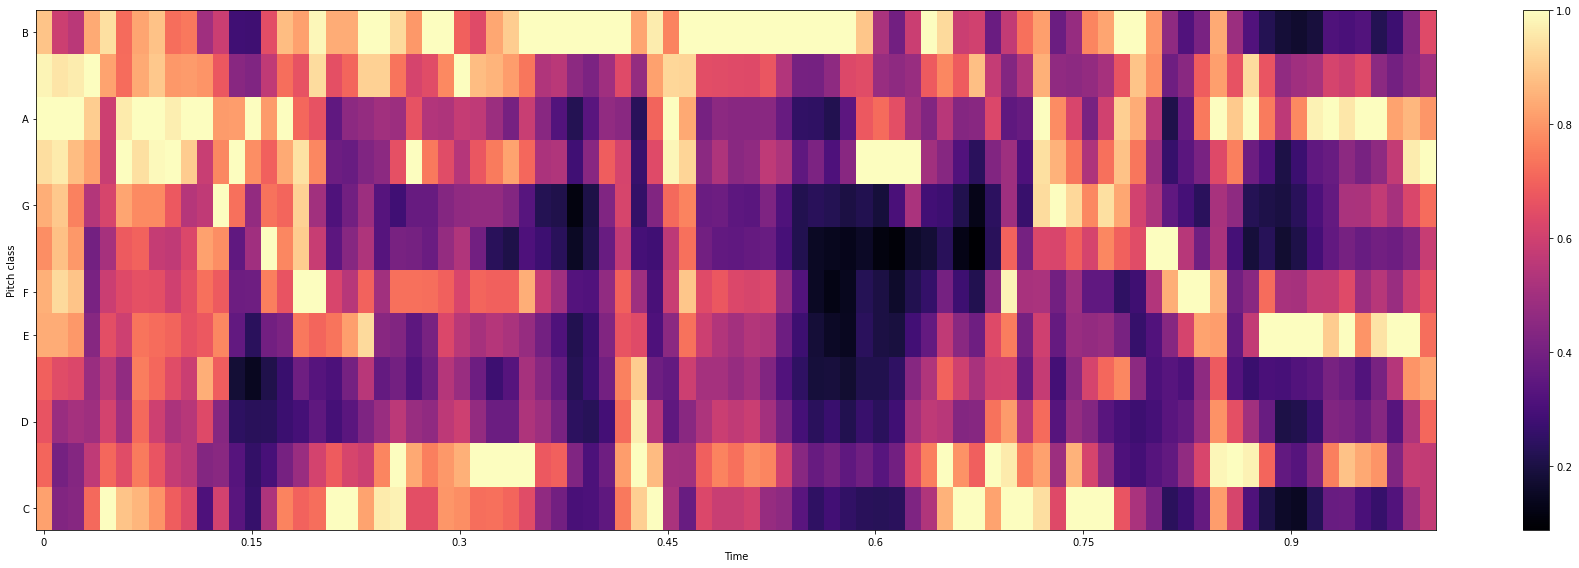

In [14]:
chroma = librosa.feature.chroma_stft(y=x[start:start+sr],sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma,sr=sr, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img)
chroma.shape

## combind genre

https://www.chosic.com/list-of-music-genres/

In [15]:
chosic_main_genre = {'pop':[],
              'electronic':[],
              'hip-hop and rap':[],
              'r&b':[],
              'latin':[],
              'rock':[],
              'metal':[],
              'country':[],
              'folk / acoustic':[],
              'classical':[],
              'jazz':[],
              'blues':[],
              'easy listening':[],
              'new age':[],
              'world / traditional folk':[]}
chosic_main_genre_list = list(chosic_main_genre.keys())

In [16]:
f = open("chosic-genre.txt","r")
chosic_sub_genre = f.read().lower().split("\n")
f.close()

In [25]:
count = 0
for sub_genre in chosic_sub_genre:
    if count < len(chosic_main_genre_list) and sub_genre == chosic_main_genre_list[count]:
        main_genre_name = chosic_main_genre_list[count]
        count += 1
        continue

    chosic_main_genre[main_genre_name].append(sub_genre)

https://www.gemtracks.com/guides/view.php?title=complete-list-of-music-genres&id=298

In [26]:
gemtracks_main_genre = {'alternative':[],
                'anime':[],
                'blues':[],
                "children":[],
                'classical':[],
                'contemporary classical':[],
                'comedy':[],
                'country':[],
                'electronic':[],
                'easy listening':[],
                'electronic':[],
                'jazz':[],
                'latin':[],
                'metal':[],
                'new age':[],
                'opera':[],
                'pop':[],
                'r&b':[],
                'reggae':[],
                'rock':[],
                'soundtrack':[],
                'spoken word':[],
                'tex-mex / tejano':[]}
gemtracks_main_genre_list = list(gemtracks_main_genre.keys())

In [27]:
f = open("gemtracks-genre.txt","r")
gemtracks_sub_genre = f.read().lower().split("\n")
f.close()

In [28]:
count = 0
for sub_genre in gemtracks_sub_genre:
    gemtracks_main_genre[gemtracks_main_genre_list[count]] = sub_genre.split(",")[0:-1]
    count += 1

Check

In [29]:
#check main genre
same_genre = []
not_same_genre = []
for genre in gemtracks_main_genre_list:
    if genre in chosic_main_genre_list:
        same_genre.append(genre)
    else:
        not_same_genre.append(genre)
        
for genre in chosic_main_genre_list:
    if genre not in same_genre:
        not_same_genre.append(genre)

In [30]:
len(same_genre), len(not_same_genre)

(12, 13)

In [31]:
same_genre

['blues',
 'classical',
 'country',
 'electronic',
 'easy listening',
 'jazz',
 'latin',
 'metal',
 'new age',
 'pop',
 'r&b',
 'rock']

In [32]:
all_genre = {'blues':[],
             'classical':[],
             'country':[],
             'electronic':[],
             'easy listening':[],
             'jazz':[],
             'latin':[],
             'metal':[],
             'new age':[],
             'pop':[],
             'r&b':[],
             'rock':[],
             'alternative':[],
             'anime':[],
             "children":[],
             'contemporary classical':[],
             'comedy':[],
             'opera':[],
             'reggae':[],
             'soundtrack':[],
             'spoken word':[],
             'tex-mex / tejano':[],
             'hip-hop and rap':[],
             'folk / acoustic':[],
             'world / traditional folk':[]}

In [35]:
for genre in all_genre:
    if genre in same_genre:
        all_genre[genre] = chosic_main_genre[genre] + gemtracks_main_genre[genre]
    else:
        if genre in chosic_main_genre_list:
            all_genre[genre] = chosic_main_genre[genre]
        else:
            all_genre[genre] = gemtracks_main_genre[genre]

In [36]:
len(all_genre)

25

In [44]:
get_genre = df_genre['genre'].unique()

dict_keys(['blues', 'classical', 'country', 'electronic', 'easy listening', 'jazz', 'latin', 'metal', 'new age', 'pop', 'r&b', 'rock', 'alternative', 'anime', 'children', 'contemporary classical', 'comedy', 'opera', 'reggae', 'soundtrack', 'spoken word', 'tex-mex / tejano', 'hip-hop and rap', 'folk / acoustic', 'world / traditional folk'])

In [55]:
all_sub_genre = []
for main_genre in all_genre:
    for sub_genre in all_genre.get(main_genre):
        all_sub_genre.append(sub_genre)

In [56]:
count = 0
have_genre = []
not_have_genre = []
for genre in get_genre:
    if genre in all_sub_genre:
        have_genre.append(genre)
        count += 1
    else:
        not_have_genre.append(genre)

In [71]:
temp = []
for genre in have_genre:
    for main_genre in all_genre:
        if genre in all_genre[main_genre]:
            temp.append(main_genre)
            if main_genre == "world / traditional folk":
                print(genre)

latino
world-music


In [58]:
test = list(set(temp))

In [69]:
temp

['folk / acoustic',
 'rock',
 'alternative',
 'electronic',
 'new age',
 'anime',
 'metal',
 'country',
 'blues',
 'electronic',
 'pop',
 'electronic',
 'children',
 'easy listening',
 'classical',
 'electronic',
 'comedy',
 'country',
 'reggae',
 'rock',
 'electronic',
 'electronic',
 'r&b',
 'reggae',
 'electronic',
 'electronic',
 'electronic',
 'hip-hop and rap',
 'electronic',
 'rock',
 'folk / acoustic',
 'r&b',
 'electronic',
 'electronic',
 'rock',
 'metal',
 'rock',
 'alternative',
 'easy listening',
 'rock',
 'electronic',
 'metal',
 'electronic',
 'metal',
 'electronic',
 'country',
 'electronic',
 'electronic',
 'pop',
 'electronic',
 'pop',
 'electronic',
 'pop',
 'electronic',
 'jazz',
 'pop',
 'children',
 'latin',
 'world / traditional folk',
 'pop',
 'metal',
 'rock',
 'metal',
 'electronic',
 'new age',
 'classical',
 'contemporary classical',
 'opera',
 'easy listening',
 'pop',
 'pop',
 'pop',
 'electronic',
 'rock',
 'rock',
 'alternative',
 'r&b',
 'reggae',
 'lat

In [59]:
for i in all_genre:
    if i not in test:
        print(i)

soundtrack
spoken word
tex-mex / tejano


In [60]:
len(all_genre)

25

In [61]:
len(get_genre)

113

In [62]:
len(have_genre)

88

In [63]:
len(get_genre)-len(have_genre)

25

In [64]:
not_have_genre

['afrobeat',
 'brazil',
 'british',
 'dance',
 'drum-and-bass',
 'forro',
 'french',
 'german',
 'groove',
 'happy',
 'indian',
 'indie',
 'iranian',
 'j-dance',
 'malay',
 'mpb',
 'pagode',
 'party',
 'sad',
 'samba',
 'show-tunes',
 'songwriter',
 'spanish',
 'swedish',
 'turkish']

In [67]:
all_genre.keys()

dict_keys(['blues', 'classical', 'country', 'electronic', 'easy listening', 'jazz', 'latin', 'metal', 'new age', 'pop', 'r&b', 'rock', 'alternative', 'anime', 'children', 'contemporary classical', 'comedy', 'opera', 'reggae', 'soundtrack', 'spoken word', 'tex-mex / tejano', 'hip-hop and rap', 'folk / acoustic', 'world / traditional folk'])

## other

In [73]:
list_music_other = ['danceability', 'energy', 'key',
        'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo']

In [74]:
df_genre.groupby("genre")[list_music_other].mean()

danceability    energy    key   loudness   mode  speechiness  \
genre                                                                       
acoustic         0.546440  0.475285  5.340  -9.079896  0.848     0.042356   
afrobeat         0.655636  0.655600  5.432  -8.267400  0.548     0.080922   
alt-rock         0.500864  0.752492  5.328  -6.197576  0.680     0.054430   
alternative      0.564772  0.751976  5.224  -5.962980  0.520     0.108056   
ambient          0.369430  0.244085  5.008 -18.623788  0.680     0.039656   
...                   ...       ...    ...        ...    ...          ...   
techno           0.683992  0.793512  5.620  -7.118500  0.492     0.060262   
trance           0.542024  0.870596  5.300  -5.784636  0.512     0.098134   
trip-hop         0.639556  0.602737  5.600  -9.247276  0.488     0.067781   
turkish          0.630318  0.600225  5.292  -9.122128  0.256     0.081347   
world-music      0.446424  0.578208  5.060  -7.565736  0.868     0.039745   

             acousticness  instrumentalness  liveness   valence       tempo  
genre                                                                        
acoustic         0.482403          0.028144  0.150685  0.423076  117.980444  
afrobeat         0.287818          0.371916  0.156656  0.700054  116.120104  
alt-rock         0.083948          0.078163  0.181390  0.461360  123.361228  
alternative      0.146314          0.038026  0.202850  0.490412  122.498520  
ambient          0.747524          0.582935  0.129477  0.181117  110.708192  
...                   ...               ...       ...       ...         ...  
techno           0.084957          0.403252  0.179294  0.437440  127.925704  
trance           0.028704          0.193833  0.241626  0.348287  127.389632  
trip-hop         0.247367          0.444229  0.157232  0.443382  116.545012  
turkish          0.305777          0.222452  0.155514  0.410771  117.605020  
world-music      0.202493          0.002286  0.199694  0.252432  125.056036  

[113 rows x 11 columns]